In [ ]:
#pip install captcha

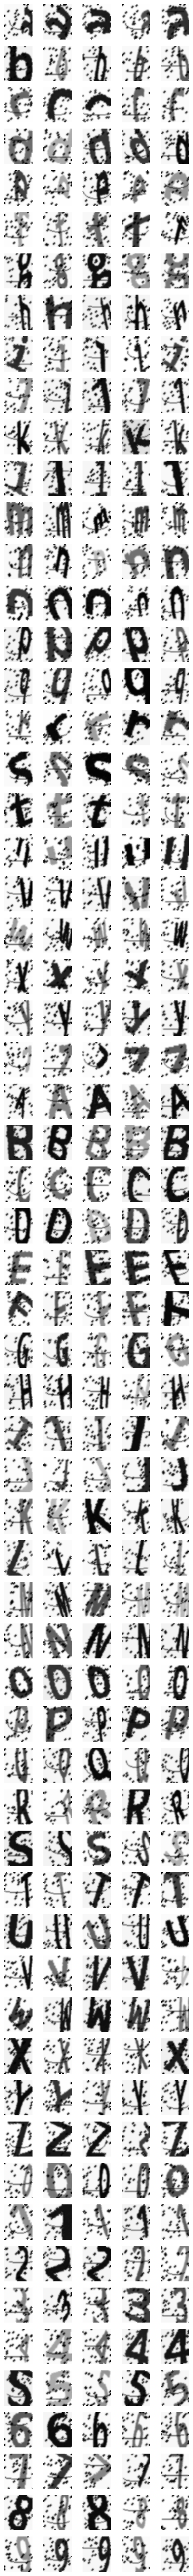

In [19]:
import os
import string
import random
import numpy as np
import matplotlib.pyplot as plt
from captcha.image import ImageCaptcha

characters = string.ascii_letters + string.digits
samples = 5
image_width = 40
image_height = 50
output_dir = 'temporary_captcha_images'

os.makedirs(output_dir, exist_ok=True)

for char in characters:
    for i in range(samples):
        # Generate a CAPTCHA of a single value (A-Z, a-z, 0-9)
        captcha_text = char
        captcha = ImageCaptcha(width=image_width, height=image_height)
        captcha_image = captcha.generate_image(captcha_text)

        # Convert CAPTCHA to black & white
        captcha_image = captcha_image.convert('L')

        # Save CAPTCHA as PNG
        letter_case = 'upper' if char.isupper() else ('lower' if char.islower() else '') 
        underscore = '_' if letter_case else ''
        filename = os.path.join(output_dir, f'{letter_case}{underscore}{char}_{i}.png')
        captcha_image.save(filename)

# Plot
fig, axs = plt.subplots(len(characters), samples, figsize=(samples, len(characters)))

for i, char in enumerate(characters):
    for j in range(samples):
        letter_case = 'upper' if char.isupper() else ('lower' if char.islower() else '')
        underscore = '_' if letter_case else ''
        image_path = os.path.join(output_dir, f'{letter_case}{underscore}{char}_{j}.png')
        image = plt.imread(image_path)
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')
    axs[i, 0].set_ylabel(f"{char} ({letter_case})", rotation=0, labelpad=15)

plt.tight_layout()
plt.show()